In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [87]:
df_final_demo = pd.read_csv('df_final_demo.txt', delimiter=',',encoding='utf-8')
df_final_demo.to_csv('df_final_demo.csv', index=False)

In [88]:
df_final_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [89]:
df_final_demo.shape

(70609, 9)

In [90]:
df_final_demo.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [91]:
df_final_demo.dropna(how='all',inplace =True)

In [92]:
df_final_demo.drop_duplicates()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [93]:
df_final_demo.shape

(70609, 9)

In [94]:
df_final_demo.rename(columns={
    'clnt_tenure_yr': 'fidelity_client_years',
    'clnt_tenure_mnth': 'fidelity_client_months',
    'clnt_age': 'client_age',
    'num_accts': 'number_accounts',
    'calls_6_mnth': 'total_calls_last_6_months',
    'logons_6_mnth': 'total_logons_last_6_months',
    'bal': 'balance',
    'gendr':'gender'

}, inplace=True) 

In [95]:
df_nan = df_final_demo[df_final_demo['client_age'].isna()]
df_nan

,client_id,fidelity_client_years,fidelity_client_months,client_age,gender,number_accounts,balance,total_calls_last_6_months,total_logons_last_6_months
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df_final_demo["fidelity_client_years"].unique()

array([ 6.,  7.,  5., 16., 12., 30., 15.,  8.,  4.,  3., 10., 11., 13.,
       14., 19., 18., 25., 23., 21., 17.,  9., 27., 24., 20., 28., 22.,
       29., 46., 26., 32., 33., 35.,  2., 38., 31., 48., 34., 36., 51.,
       nan, 47., 49., 37., 39., 40., 55., 42., 44., 43., 50., 54., 41.,
       45., 52., 62.])

In [97]:
df_final_demo['gender'] = df_final_demo['gender'].replace('X', 'U')

In [98]:
df_final_demo.dropna(subset=['client_age'], inplace=True)
df_final_demo.isna().sum()

client_id                     0
fidelity_client_years         0
fidelity_client_months        0
client_age                    0
gender                        0
number_accounts               0
balance                       0
total_calls_last_6_months     0
total_logons_last_6_months    0
dtype: int64

In [99]:
df_final_demo

,client_id,fidelity_client_years,fidelity_client_months,client_age,gender,number_accounts,balance,total_calls_last_6_months,total_logons_last_6_months
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [100]:
df_final_demo.describe()

,client_id,fidelity_client_years,fidelity_client_months,client_age,number_accounts,balance,total_calls_last_6_months,total_logons_last_6_months
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594.000000,7.059400e+04,70594.000000,70594.000000
mean,5.005026e+06,12.053007,150.659999,46.442240,2.255532,1.474467e+05,3.382469,5.566720
std,2.877289e+06,6.871850,82.090264,15.591273,0.535000,3.015106e+05,2.236595,2.353296
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519543e+06,6.000000,82.000000,32.500000,2.000000,3.734660e+04,1.000000,4.000000
50%,5.016974e+06,11.000000,136.000000,47.000000,2.000000,6.333459e+04,3.000000,5.000000
75%,7.483074e+06,16.000000,192.000000,59.000000,2.000000,1.375461e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [101]:
df_final_demo.drop(columns='fidelity_client_months', inplace=True)

Classify Age

In [102]:
def classify_age(client_age):
    if client_age <= 30:
        return 'young'
    elif 30 < client_age < 60:
        return 'adult'
    elif client_age >= 60:
        return 'senior'
    else:
        return 'unknown'

# Aplicar la función a la columna 'client_age' para crear una nueva columna
df_final_demo['client_age_group'] = df_final_demo['client_age'].apply(classify_age)

In [177]:
df_final_demo

,client_id,fidelity_client_years,client_age,gender,number_accounts,balance,total_calls_last_6_months,total_logons_last_6_months,client_age_group,fidelity_group,balance_group
0,836976,6.0,60.5,U,2.0,45105.30,6.0,9.0,senior,regular,bronze
1,2304905,7.0,58.0,U,2.0,110860.30,6.0,9.0,adult,regular,silver
2,1439522,5.0,32.0,U,2.0,52467.79,6.0,9.0,adult,new,silver
3,1562045,16.0,49.0,M,2.0,67454.65,3.0,6.0,adult,premium,silver
4,5126305,12.0,33.0,F,2.0,103671.75,0.0,3.0,adult,regular,silver
...,...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,38.5,U,3.0,1411062.68,5.0,5.0,adult,new,platinum
70605,8981690,12.0,31.0,M,2.0,101867.07,6.0,6.0,adult,regular,silver
70606,333913,16.0,61.5,F,2.0,40745.00,3.0,3.0,senior,premium,bronze
70607,1573142,21.0,68.0,M,3.0,475114.69,4.0,4.0,senior,premium,gold


In [104]:
df_final_demo["client_age"].min()

np.float64(13.5)

In [105]:
df_final_demo["client_age"].max()

np.float64(96.0)

In [106]:
df_final_demo['client_age_group'].value_counts()

client_age_group
adult     40351
senior    16219
young     14024
Name: count, dtype: int64

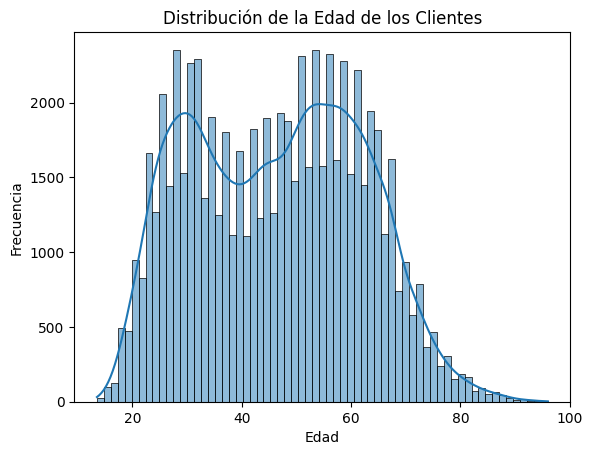

count    70594.000000
mean        46.442240
std         15.591273
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: client_age, dtype: float64


In [107]:
sns.histplot(df_final_demo['client_age'], kde=True)
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas de la edad
print(df_final_demo['client_age'].describe())

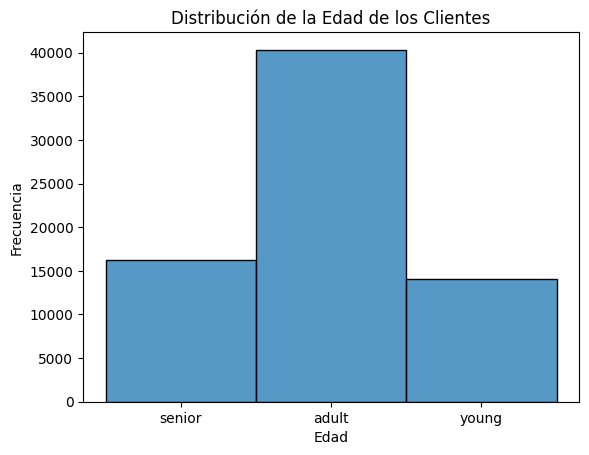

count    70594.000000
mean        46.442240
std         15.591273
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: client_age, dtype: float64


In [108]:
sns.histplot(df_final_demo['client_age_group'])
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas de la edad
print(df_final_demo['client_age'].describe())

Classify fidelity years

In [109]:
df_final_demo['fidelity_client_years'].unique()

array([ 6.,  7.,  5., 16., 12., 30., 15.,  8.,  4.,  3., 10., 11., 13.,
       14., 19., 18., 25., 23., 21., 17.,  9., 27., 24., 20., 28., 22.,
       29., 46., 26., 32., 33., 35.,  2., 38., 31., 48., 34., 36., 51.,
       47., 49., 37., 39., 40., 55., 42., 44., 43., 50., 54., 41., 45.,
       52., 62.])

In [110]:
def classify_fidelity_years(fidelity):
    if fidelity <= 5:
        return 'new'
    elif  6<= fidelity <=15 :
        return 'regular'
    elif fidelity >= 16:
        return 'premium'
    else:
        return 'unknown'

# Aplicar la función a la columna 'client_age' para crear una nueva columna
df_final_demo['fidelity_group'] = df_final_demo['fidelity_client_years'].apply(classify_fidelity_years)

In [111]:
df_final_demo["fidelity_group"].unique()

array(['regular', 'new', 'premium'], dtype=object)

In [112]:
df_final_demo['fidelity_group'].value_counts()

fidelity_group
regular    40591
premium    17831
new        12172
Name: count, dtype: int64

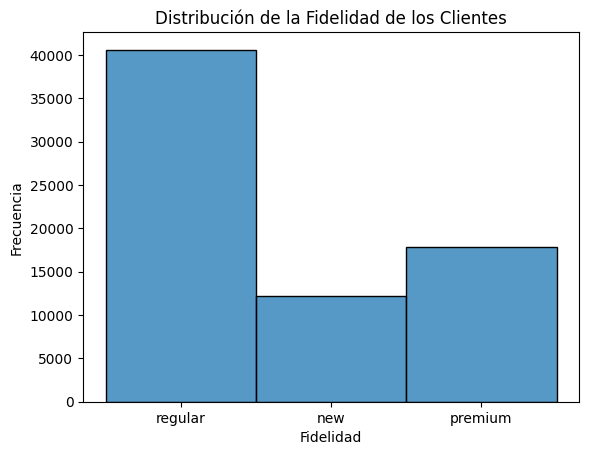

count    70594.000000
mean        12.053007
std          6.871850
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         62.000000
Name: fidelity_client_years, dtype: float64


In [113]:
sns.histplot(df_final_demo['fidelity_group'])
plt.title('Distribución de la Fidelidad de los Clientes')
plt.xlabel('Fidelidad')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas de la edad
print(df_final_demo['fidelity_client_years'].describe())

Classify balance

In [114]:
df_final_demo['balance'].max()

np.float64(16320040.15)

In [115]:
df_final_demo['balance'].min()

np.float64(13789.419999999998)

In [116]:
def classify_balance(balance):
    if balance <= 50000:
        return 'bronze'
    elif 50000 < balance <= 200000:
        return 'silver'
    elif 200000 < balance <= 1000000:
        return 'gold'
    elif balance > 1000000:
        return 'platinum'
    else:
        return 'unknown'

# Aplicar la función a la columna 'balance' para crear una nueva columna
df_final_demo['balance_group'] = df_final_demo['balance'].apply(classify_balance)


In [117]:
df_final_demo['balance_group'].value_counts()

balance_group
silver      30892
bronze      27649
gold        10875
platinum     1178
Name: count, dtype: int64

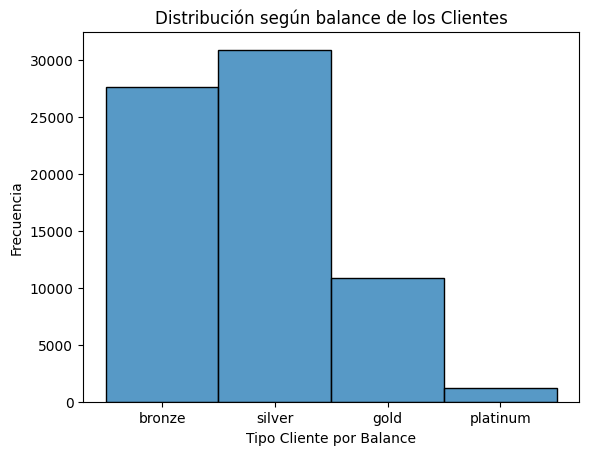

count    7.059400e+04
mean     1.474467e+05
std      3.015106e+05
min      1.378942e+04
25%      3.734660e+04
50%      6.333459e+04
75%      1.375461e+05
max      1.632004e+07
Name: balance, dtype: float64


In [118]:
sns.histplot(df_final_demo['balance_group'])
plt.title('Distribución según balance de los Clientes')
plt.xlabel('Tipo Cliente por Balance')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas de la edad
print(df_final_demo['balance'].describe())

Gender

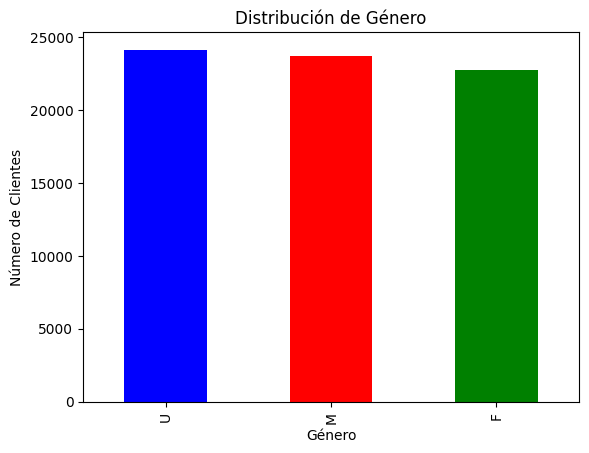

In [119]:
gender_distribution = df_final_demo['gender'].value_counts()
gender_distribution.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

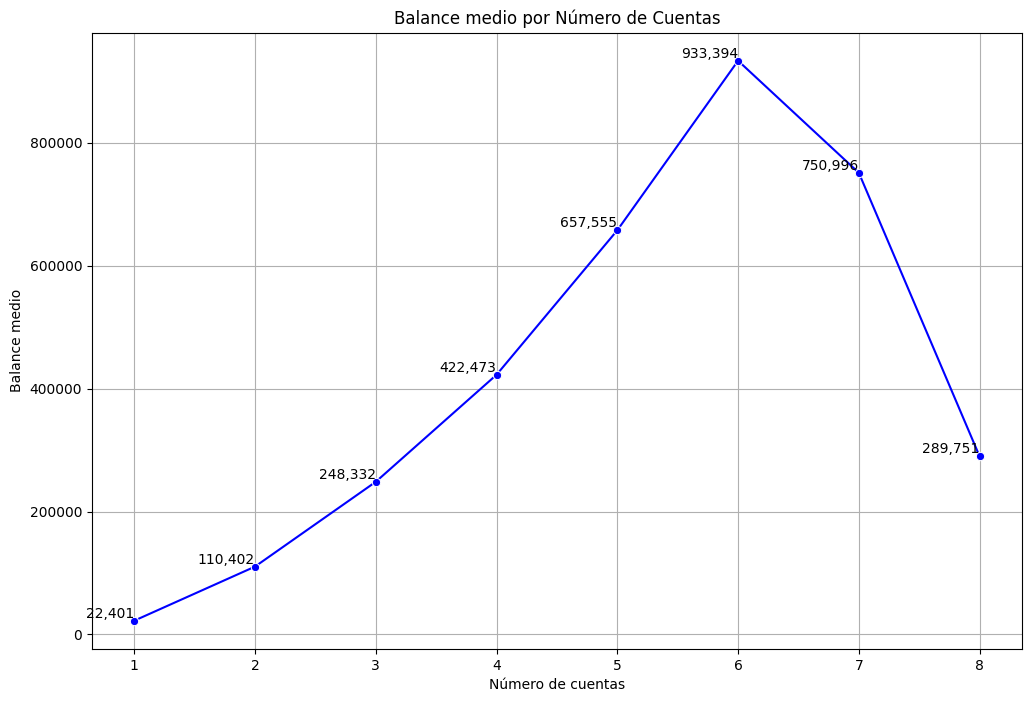

In [120]:
mean_balance_by_accounts = df_final_demo.groupby('number_accounts')['balance'].mean().reset_index()

plt.figure(figsize=(12, 8))


sns.lineplot(data=mean_balance_by_accounts, x='number_accounts', y='balance', marker='o', color='blue')


for i in range(mean_balance_by_accounts.shape[0]):
    plt.text(
        mean_balance_by_accounts['number_accounts'][i],
        mean_balance_by_accounts['balance'][i],
        f"{mean_balance_by_accounts['balance'][i]:,.0f}",
        fontsize=10,
        ha='right',
        va='bottom'
    )

plt.xlabel('Número de cuentas')
plt.ylabel('Balance medio')
plt.title('Balance medio por Número de Cuentas')
plt.grid(True)
plt.show()


In [178]:
df_final_demo.to_csv("df_variables.csv",index= False)

Hipótesis

In [121]:
import scipy.stats as st

In [122]:
# Las mujeres tienen menos media de balance que los hombres
# Los clientes más nuevos son los que menos balance medio tienen
# Los clientes senior tienen más número de cuentas de media que los adultos
# Los clientes senior tienen más media de llamadas que los jóvenes
# Las mujeres jóvenes tienen más log on de media que las mujeres senior

In [123]:
#1

#HO: mu balance_mujeres <= mu balance_hombres
#H1: mu balance_mujeres > mu balance_hombres

balance_female = df_final_demo[df_final_demo['gender'] == 'F']['balance']
balance_male = df_final_demo[df_final_demo['gender'] == 'M']['balance']
alpha = 0.05
stat, p_value = st.ttest_ind(balance_female, balance_male, alternative='greater')
print("stat: ", stat)
print("p_value: ", p_value)
if p_value > alpha:
    print("We are not able to reject the null hypothesis, female balance is lower than male balance")
else:
    print("We reject the null hypotesis")


stat:  -23.767008224572088
p_value:  1.0
We are not able to reject the null hypothesis, female balance is lower than male balance


In [124]:
balance_female.mean()

np.float64(135565.42243218288)

In [125]:
balance_male.mean()

np.float64(212299.86806693647)

In [141]:
#2
# Los clientes nuevos, los regulares y los premium tienen el mismo balance medio
# H0 = Mu nuevos = Mu regulares = Mu premium 
# H1 = Mu nuevos =! Mu regulares != Mu premium
alpha = 0.05
media_balance_cliente = df_final_demo.groupby('fidelity_group')['balance'].apply(list)

args = [media_balance_cliente[group] for group in media_balance_cliente.index]

stat, p_value = st.f_oneway(*args)
stat, p_value = st.f_oneway(*args)
print("stat: ", stat)
print("p_value: ", p_value)
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypothesis, new clients, regular clients and premium clients have not the same average balance ")

stat:  1227.9367792666003
p_value:  0.0
We reject the null hypothesis, new clients, regular clients and premium clients have not the same average balance 


In [146]:
grouped_balance = df_final_demo.groupby('fidelity_group')['balance'].mean()
grouped_balance

fidelity_group
new         89366.011304
premium    240007.977266
regular    124202.628176
Name: balance, dtype: float64

In [158]:
#Los clientes senior tienen más número de cuentas de media que los adultos
df_accounts_senior = df_final_demo[df_final_demo["client_age_group"] == "senior"]["number_accounts"]
df_accounts_adults = df_final_demo[df_final_demo["client_age_group"] == "adult"]["number_accounts"]


#HO: mu número cuentas adultos <= mu número cuentas senior
#H1: mu número cuentas senior > mu número cuentas adultos
alpha = 0.05
stat, p_value = st.ttest_ind(df_accounts_senior, df_accounts_adults, alternative='greater')
print("stat: ", stat)
print("p_value: ", p_value)
if p_value > alpha:
    print("We are not able to reject the null hypothesis, number of adult accounts is lower or equal than number of senior accounts")
else:
    print("We reject the null hypotesis")


stat:  -4.400835142609296
p_value:  0.9999945983973528
We are not able to reject the null hypothesis, number of senior accounts is bigger or equal than number of adult accounts


In [ ]:
mean_accounts_senior

np.float64(2.23749922929897)

In [ ]:
mean_accounts_adults

np.float64(2.2595226884092092)

In [157]:
#Los clientes senior tienen más media de llamadas que los jóvenes
df_calls_senior = df_final_demo[df_final_demo["client_age_group"] == "senior"]["total_calls_last_6_months"]
df_calls_youngs = df_final_demo[df_final_demo["client_age_group"] == "young"]["total_calls_last_6_months"]


#HO: mu llamadas senior >= mu número llamadas young
#H1: mu número llamadas young < mu número llamadas senior
alpha = 0.05
stat, p_value = st.ttest_ind(df_calls_senior, df_calls_youngs, alternative='less')
print("stat: ", stat)
print("p_value: ", p_value)
if p_value > alpha:
    print("We are not able to reject the null hypothesis, number of senior calls is bigger or equal than number of young calls")
else:
    print("We reject the null hypotesis")


stat:  3.279257308465833
p_value:  0.9994790087321517
We are not able to reject the null hypothesis, number of senior calls is bigger or equal than number of young calls


In [176]:
print(df_calls_senior.mean())
print(df_calls_youngs.mean())

3.6070657870398914
3.5232458642327438


In [173]:
# Las mujeres jóvenes tienen más log on de media que las mujeres senior

df_logon_young_f = df_final_demo[(df_final_demo["gender"] == "F") & (df_final_demo["client_age_group"] == "young")]["total_logons_last_6_months"]
df_logon_senior_f = df_final_demo[(df_final_demo["gender"] == "F") & (df_final_demo["client_age_group"] == "senior")]["total_logons_last_6_months"]

#HO: mu logon mujeres jóvenes  >= mu logon mujeres senior
#H1: mu número log on senior < mu número log on jóvenes
alpha = 0.05
stat, p_value = st.ttest_ind(df_logon_young_f, df_logon_senior_f, alternative='less')
print("stat: ", stat)
print("p_value: ", p_value)
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis, number of young females log on is bigger or equal than number of senior female log on")

stat:  -13.888080949715489
p_value:  1.0494447402740657e-43
We reject the null hypotesis, number of young females log on is bigger or equal than number of senior female log on


In [168]:
df_logon_young_f = df_final_demo[(df_final_demo["gender"] == "F") & (df_final_demo["client_age_group"] == "young")]["total_logons_last_6_months"]
df_logon_young_f.mean()

np.float64(5.016453382084095)

In [170]:
df_logon_senior_f = df_final_demo[(df_final_demo["gender"] == "F") & (df_final_demo["client_age_group"] == "senior")]["total_logons_last_6_months"]
df_logon_senior_f.mean()

np.float64(5.734635083226633)